## Supplementary notebook for Brachyury expression levels predict lineage potential and axis-forming ability of in vitro derived neuromesodermal progenitors.

$Anahí\text{ }Binagui\text{-}Casas^{1\text{,}*\text{,}\#}$, $Anna\text{ }Granés^{1\text{,}*}$, $Alberto\text{ }Ceccarelli^2$, $Filip\text{ }J.\text{ }Wymeersch^3$, $Matthew\text{ }French^4$, $Rosa\text{ }Portero^1$, $Jen\text{ }Annoh^1$, $Yali\text{ }Huang^5$, $Eleni\text{ }Karagianni^6$, $Frederick\text{ }C.\text{ }K.\text{ }Wong^7$, $A.\text{ }Sophie\text{ }Brumm^1$, $Daniel\text{ }Lopez\text{ }Ramajo^8$, $Minoru\text{ }Takasato^{3\text{,}9}$, $Sally\text{ }Lowell^1$, $Osvaldo\text{ }Chara^{2\text{,}10}$, $Valerie\text{ }Wilson^{1\text{,}\#}$


<pre>
  1.       Institute for Regeneration and Repair, Centre for Regenerative Medicine, Institute for Stem Cell Research, School of Biological Sciences, University of Edinburgh, 5 Little France Drive, Edinburgh EH16 4UU, Scotland.

  2.       School of Biosciences, University of Nottingham, Sutton Bonington Campus, Nottingham LE12, U.K.

  3.       Current: RIKEN Center for Biosystems Dynamics Research, 2-2-3 Minatojima-minamimachi, Kobe 650-0047, Japan.

  4.       Current: Department of Genetics, University of Cambridge, Cambridge, CB2 3EH, U.K.

  5.       Current: Department of Cell, Developmental and Integrative Biology, University of Alabama at Birmingham, 1918 University Blvd, Birmingham, AL 35294, U.S.A.

  6.       Current: GSK, Hills Rd, Cambridge CB2 0QQ, U.K.
 
  7.       Current: The Wellcome Sanger Institute, Wellcome Genome Campus, Cambridge CB10 1SA, U.K.Current: 

  8.       Current: Immunology Unit, Department of Pathology and Experimental Therapy, School of Medicine, Universitat de Barcelona, 08007, Barcelona, Spain. 

  9.       Laboratory of Molecular Cell Biology and Development, Department of Animal Development and Physiology, Graduate School of Biostudies, Kyoto University, Kyoto 606-8501, Japan.

 10.       Instituto de Tecnología, Universidad Argentina de la Empresa, Buenos Aires, Argentina.

* Joint first authors: Anahí Binagui-Casas, Anna Granés.
# Co-corresponding authors: a.binagui-casas@ed.ac.uk, v.wilson@ed.ac.uk
</pre>

</pre>

This notebook contains the code used to fit the mathematical model to the experimental data. It reads the Excel file with the data (change the name of the file to analyze a different experimental set), analyze data, fits the mathematical expression to it (when needed), and generate and save the figures of the study.


### Fig 5 E

Best threshold = 1744.666666666667
Colonies below ratio threshold: 78
Colonies above ratio threshold: 63


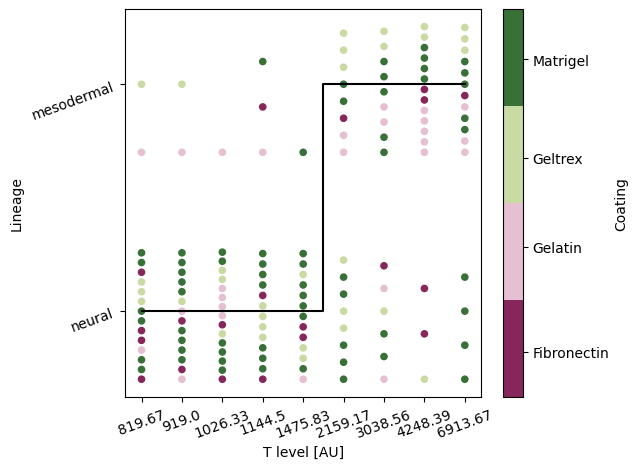

In [12]:
# fig 5 E
    
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pylab import *
from matplotlib.colors import ListedColormap

bingfp = 9

# Load dataset
df= pd.read_excel("NMP_single_cell_data_VW.xlsx")
# Preprocessing step

# Eliminate Nan
df = df.drop(columns=['outcome', 'Double_positive'])
df = df.dropna()
df.index = pd.RangeIndex(len(df.index))

# Transforms "coating" string variable to numbers 0,1,2,3. 
df["coating"].replace("Fibronectin",0,inplace=True)
df["coating"].replace("Gelatin",1,inplace=True)
df["coating"].replace("Geltrex",2,inplace=True)
df["coating"].replace("Matrigel",3,inplace=True)
df["dominating_type_gfp"] = np.zeros(df.shape[0])
df["dominating_type_mcherry"] = np.zeros(df.shape[0])

df["dominating_type"] = np.zeros(df.shape[0])
df["total_cells_target"] = np.zeros(df.shape[0])

df.index = pd.RangeIndex(len(df.index))

df["cell_cycle"] = np.zeros(df.shape[0])
df["total_cells_target"] = np.zeros(df.shape[0])
for i in range(df.shape[0]):
    if df["total_cells"][i] == 0:
        df["cell_cycle"][i] = np.nan
df = df.dropna()
df.index = pd.RangeIndex(len(df.index))


df["level_mcherry"] = pd.qcut(df["mcherry_mean"], 2, labels=False)

df["dominating_type"] = np.zeros(df.shape[0])
    
for i in range(df.shape[0]):
    if df["t_cells"][i]+27<df["sox2_cells"][i]:
        df["dominating_type"][i] = 0
    elif df["sox2_cells"][i]+27<df["t_cells"][i]:
        df["dominating_type"][i] = 1
    else:
        df["dominating_type"][i] = np.nan
df = df.dropna()
df["level_gfp"] , bin_edges_gfp= pd.qcut(df["gfp_mean"], bingfp, labels=False, retbins=True)


swarm_dispertion=0.4
df.index = pd.RangeIndex(len(df.index))
df["dominating_type_plot"] = np.zeros(df.shape[0])
df["level_gfp_plot"] = np.zeros(df.shape[0])
coatings_plot = []

counter_0 = 0
counter_1 = 0
counter_2 = 0
counter_3 = 0
counter_4 = 0
counter_5 = 0
counter_6 = 0
counter_7 = 0
counter_8 = 0
counter_00 = 0
counter_10 = 0
counter_20 = 0
counter_30 = 0
counter_40 = 0
counter_50 = 0
counter_60 = 0
counter_70 = 0
counter_80 = 0
ancho = 0.6
for i in range(df.shape[0]):
    df["level_gfp_plot"][i] = df["level_gfp"][i]
    
    if df["dominating_type"][i] == 1:
        if df["level_gfp"][i]==0:
            df["dominating_type_plot"][i] = df["dominating_type"][i]+ancho*counter_0/df["level_gfp"][df["dominating_type"]==1].value_counts()[df["level_gfp"][i]]-ancho/2
            counter_0+=1

        if df["level_gfp"][i]==1:
            df["dominating_type_plot"][i] = df["dominating_type"][i]+ancho*counter_1/df["level_gfp"][df["dominating_type"]==1].value_counts()[df["level_gfp"][i]]-ancho/2
            counter_1+=1

        if df["level_gfp"][i]==2:
            df["dominating_type_plot"][i] = df["dominating_type"][i]+ancho*counter_2/df["level_gfp"][df["dominating_type"]==1].value_counts()[df["level_gfp"][i]]-ancho/2
            counter_2+=1

        if df["level_gfp"][i]==3:
            df["dominating_type_plot"][i] = df["dominating_type"][i]+ancho*counter_3/df["level_gfp"][df["dominating_type"]==1].value_counts()[df["level_gfp"][i]]-ancho/2
            counter_3+=1

        if df["level_gfp"][i]==4:
            df["dominating_type_plot"][i] = df["dominating_type"][i]+ancho*counter_4/df["level_gfp"][df["dominating_type"]==1].value_counts()[df["level_gfp"][i]]-ancho/2
            counter_4+=1

        if df["level_gfp"][i]==5:
            df["dominating_type_plot"][i] = df["dominating_type"][i]+ancho*counter_5/df["level_gfp"][df["dominating_type"]==1].value_counts()[df["level_gfp"][i]]-ancho/2
            counter_5+=1

        if df["level_gfp"][i]==6:
            df["dominating_type_plot"][i] = df["dominating_type"][i]+ancho*counter_6/df["level_gfp"][df["dominating_type"]==1].value_counts()[df["level_gfp"][i]]-ancho/2
            counter_6+=1

        if df["level_gfp"][i]==7:
            df["dominating_type_plot"][i] = df["dominating_type"][i]+ancho*counter_7/df["level_gfp"][df["dominating_type"]==1].value_counts()[df["level_gfp"][i]]-ancho/2
            counter_7+=1

        if df["level_gfp"][i]==8:
            df["dominating_type_plot"][i] = df["dominating_type"][i]+ancho*counter_8/df["level_gfp"][df["dominating_type"]==1].value_counts()[df["level_gfp"][i]]-ancho/2
            counter_8+=1

    if df["dominating_type"][i] == 0:
        if df["level_gfp"][i]==0:
            df["dominating_type_plot"][i] = df["dominating_type"][i]+ancho*counter_00/df["level_gfp"][df["dominating_type"]==0].value_counts()[df["level_gfp"][i]]-ancho/2
            counter_00+=1

        if df["level_gfp"][i]==1:
            df["dominating_type_plot"][i] = df["dominating_type"][i]+ancho*counter_10/df["level_gfp"][df["dominating_type"]==0].value_counts()[df["level_gfp"][i]]-ancho/2
            counter_10+=1

        if df["level_gfp"][i]==2:
            df["dominating_type_plot"][i] = df["dominating_type"][i]+ancho*counter_20/df["level_gfp"][df["dominating_type"]==0].value_counts()[df["level_gfp"][i]]-ancho/2
            counter_20+=1

        if df["level_gfp"][i]==3:
            df["dominating_type_plot"][i] = df["dominating_type"][i]+ancho*counter_30/df["level_gfp"][df["dominating_type"]==0].value_counts()[df["level_gfp"][i]]-ancho/2
            counter_30+=1

        if df["level_gfp"][i]==4:
            df["dominating_type_plot"][i] = df["dominating_type"][i]+ancho*counter_40/df["level_gfp"][df["dominating_type"]==0].value_counts()[df["level_gfp"][i]]-ancho/2
            counter_40+=1

        if df["level_gfp"][i]==5:
            df["dominating_type_plot"][i] = df["dominating_type"][i]+ancho*counter_50/df["level_gfp"][df["dominating_type"]==0].value_counts()[df["level_gfp"][i]]-ancho/2
            counter_50+=1

        if df["level_gfp"][i]==6:
            df["dominating_type_plot"][i] = df["dominating_type"][i]+ancho*counter_60/df["level_gfp"][df["dominating_type"]==0].value_counts()[df["level_gfp"][i]]-ancho/2
            counter_60+=1

        if df["level_gfp"][i]==7:
            df["dominating_type_plot"][i] = df["dominating_type"][i]+ancho*counter_70/df["level_gfp"][df["dominating_type"]==0].value_counts()[df["level_gfp"][i]]-ancho/2
            counter_70+=1

        if df["level_gfp"][i]==8:
            df["dominating_type_plot"][i] = df["dominating_type"][i]+ancho*counter_80/df["level_gfp"][df["dominating_type"]==0].value_counts()[df["level_gfp"][i]]-ancho/2
            counter_80+=1

    coatings_plot.append(df["coating"][i])


# Tus colores personalizados
colors = ["#87265A", "#E5BFD2", "#C9DAA3", "#387037"]

# Crear un colormap listado
cmap = ListedColormap(colors)

# Scatter plot
plt.scatter(df["level_gfp_plot"], df["dominating_type_plot"], c=coatings_plot, cmap=cmap, s=20)

# Colorbar
cbar = plt.colorbar(label="Coating")
cbar.set_ticks([0.35, 1.16, 1.85, 2.61])
cbar.set_ticklabels(["Fibronectin", "Gelatin", "Geltrex", "Matrigel"])

binplot=[]
for xi in range(0,bingfp):
    binplot.append(str(round((bin_edges_gfp[xi+1] + bin_edges_gfp[xi]) / 2, 2)))
    
# we do the fitting manually because curve_fit find too many local minima and could not fit correctly.
thresholds = np.arange(0, df["level_gfp"].max()+1) 
scores = []
for t in thresholds:
    score = 0
    for i in range(df.shape[0]):
        if df["level_gfp"][i] < t and df["dominating_type"][i] == 1:  # mesodermal abajo
            score += 1
        elif df["level_gfp"][i] >= t and df["dominating_type"][i] == 0:  # neural arriba
            score += 1
    scores.append(score)
scores = np.array(scores)
min_score = scores.min()
best_threshold = thresholds[np.where(scores == min_score)[0][0]]
print(f"Best threshold = {bin_edges_gfp[best_threshold]}")

below_threshold = (df["level_gfp"] < best_threshold).sum()
above_or_equal_threshold = (df["level_gfp"] >= best_threshold).sum()

print("Colonies below ratio threshold:", below_threshold)
print("Colonies above ratio threshold:", above_or_equal_threshold)


def step_func(x,a):
    result = []
    for xi in x:
        if xi>=a:
            result.append(max(df["dominating_type"]))
        else:
            result.append(min(df["dominating_type"]))
    return result
df = df.sort_values(by=['level_gfp'], ascending=False)
x = df["level_gfp"]
y = step_func(x, best_threshold)
plt.step(x, y, where='mid', color='black')

plt.xticks(range(0,bingfp), binplot, 
           rotation=20)
plt.ylabel("Lineage")
plt.xlabel("T level [AU]")
plt.yticks([0, 1], ['neural', 'mesodermal'], rotation=20)
plt.tight_layout()
plt.savefig("Fig5e-gfp1745.svg")
plt.show()
plt.close()

##### Fig 5 F

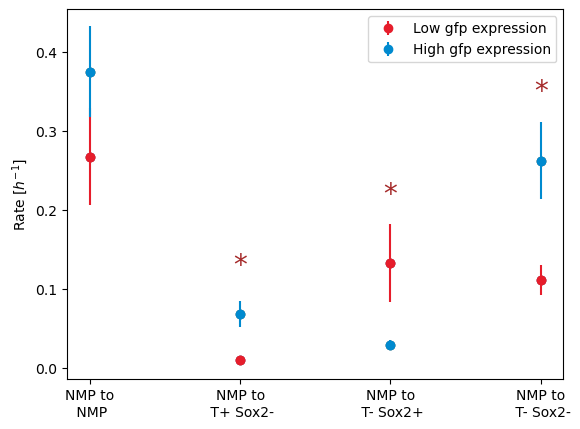

Mann whitney p= [6.82069476e-02 3.65717962e-11 1.44250174e-04 2.07878410e-02]


In [35]:
# fig 5 F

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.optimize import minimize, rosen, rosen_der
import math
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import mannwhitneyu
from scipy import stats

def dp_cells(t, a, b, c, d, dp0):
    cells = dp0 * np.exp((a-b-c-d) * t)
    return cells

def t_cells(t, a, b, c, d, dp0, t0):
    cells = 2 * b * dp0 * np.exp((a-b-c-d) * t) / (a-b-c-d) + t0
    return cells

def s_cells(t, a, b, c, d, dp0, s0):
    cells = 2 * c * dp0 * np.exp((a-b-c-d) * t) / (a-b-c-d) + s0
    return cells

def dn_cells(t, a, b, c, d, dp0, dn0):
    cells = 2 * d * dp0 * np.exp((a-b-c-d) * t) / (a-b-c-d) + dn0
    return cells


def min_func(param):
    a=param[0] + param[1] + param[2] + param[3]
    b=param[1]
    c=param[2]
    d=param[3]

    if not math.isnan(np.sqrt((dp_cells(t, a, b, c, d, dp0)-cell_fit[0])**2+
                   (t_cells(t, a, b, c, d, dp0, t0)-cell_fit[1])**2+
                   (s_cells(t, a, b, c, d, dp0, s0)-cell_fit[2])**2+
                   (dn_cells(t, a, b, c, d, dp0, dn0)-cell_fit[3])**2)):

        if dp_cells(t, a, b, c, d, dp0) + t_cells(t, a, b, c, d, dp0, t0) + s_cells(t, a, b, c, d, dp0, s0) + dn_cells(t, a, b, c, d, dp0, dn0) < 1:
            return 1000000000000000
        else:
            return np.sqrt((dp_cells(t, a, b, c, d, dp0)-cell_fit[0])**2+
                   (t_cells(t, a, b, c, d, dp0, t0)-cell_fit[1])**2+
                   (s_cells(t, a, b, c, d, dp0, s0)-cell_fit[2])**2+
                   (dn_cells(t, a, b, c, d, dp0, dn0)-cell_fit[3])**2)    
    else:
        return 1000000000000000

# Load dataset
df= pd.read_excel("NMP_single_cell_data_VW.xlsx")
# Preprocessing step

# Eliminate Nan
df = df.drop(columns=['outcome', 'Double_positive'])
df = df.dropna()
df.index = pd.RangeIndex(len(df.index))
df["coating"].replace("Fibronectin",0,inplace=True)
df["coating"].replace("Gelatin",1,inplace=True)
df["coating"].replace("Geltrex",2,inplace=True)
df["coating"].replace("Matrigel",3,inplace=True)
df["dummy_variable"] = np.zeros(df.shape[0])
for i in range(df.shape[0]):
    if df["total_cells"][i] == 0:
        df["dummy_variable"][i] = np.nan
df = df.dropna()
df.index = pd.RangeIndex(len(df.index))

dp0 = 1
t0 = 0
s0 = 0
dn0 = 0
t = 5 * 24

parameters_0_minus = []
parameters_0_plus = []
parameters_1_minus = []
parameters_1_plus = []
parameters_2_minus = []
parameters_2_plus = []
parameters_3_minus = []
parameters_3_plus = []

for i in range(df.shape[0]):
    if df["gfp_mean"][i]<=1745:
        cell_fit = []
        cell_fit.append(df["dp_cells"][i])
        cell_fit.append(df["t_cells"][i])
        cell_fit.append(df["sox2_cells"][i])
        cell_fit.append(df["dneg_cells"][i])
        cell_fit.append(df["total_cells"][i])

        x0 = [0.05,0.02,0.02,0.02]
        max_evaluations=10000
        res = minimize(min_func,x0,bounds=((0, None), (0, None), (0, None), (0, None)), method='L-BFGS-B', options={'maxfev': max_evaluations})

        parameters_0_minus.append(res.x)
    if df["gfp_mean"][i]>1745:
        
        cell_fit = []
        cell_fit.append(df["dp_cells"][i])
        cell_fit.append(df["t_cells"][i])
        cell_fit.append(df["sox2_cells"][i])
        cell_fit.append(df["dneg_cells"][i])
        cell_fit.append(df["total_cells"][i])

        x0 = [0.05,0.02,0.02,0.02]
        max_evaluations=10000
        res = minimize(min_func,x0,bounds=((0, None), (0, None), (0, None), (0, None)), method='L-BFGS-B', options={'maxfev': max_evaluations})

        parameters_0_plus.append(res.x)
            

resultados = [parameters_0_minus,parameters_0_plus]
counter = 0

for parameters in resultados:

    # Convertir la lista de arrays en una matriz 2D de NumPy
    data_matrix = np.array(parameters)

    for element in data_matrix:
        element[0]+=element[1]+element[2]+element[3]

    # Calcular la media y la desviación estándar de cada columna
    mean_values = np.mean(data_matrix, axis=0)
    std_values = stats.sem(data_matrix, axis=0)

    mean_to_plot = mean_values
    std_to_plot = std_values

    x_plot = range(0,4)
    plt.scatter(x_plot,mean_to_plot)
    if counter == 0:
        plt.scatter(x_plot, mean_to_plot, color="#E61D2B")  # Rojo
        plt.errorbar(x_plot, mean_to_plot, yerr=std_to_plot, fmt='o', label="Low gfp expression", color="#E61D2B")
        counter = 1
        mann_whitney1 = data_matrix
    else:
        counter = 0
        plt.scatter(x_plot, mean_to_plot, color="#008ACF")  # Azul
        plt.errorbar(x_plot, mean_to_plot, yerr=std_to_plot, fmt='o', label="High gfp expression", color="#008ACF")
        plt.legend()
        plt.xticks([0,1,2,3], ["NMP to\n NMP","NMP to\n T+ Sox2-","NMP to\n T- Sox2+","NMP to\n T- Sox2-"])
        plt.ylabel(r'Rate [$h^{-1}$]')
        # Añadir asteriscos de significancia
        plt.text(1, 0.13, '*', fontsize=20, color='brown', ha='center', va='center')
        plt.text(2, 0.22, '*', fontsize=20, color='brown', ha='center', va='center')
        plt.text(3, 0.35, '*', fontsize=20, color='brown', ha='center', va='center')        
        plt.savefig("fig4c-gfp1745.svg")
        plt.show()
        plt.close()

        U1, p = mannwhitneyu(mann_whitney1, data_matrix, method="exact")

        print("Mann whitney p=",p)

### Sup fig 3 G

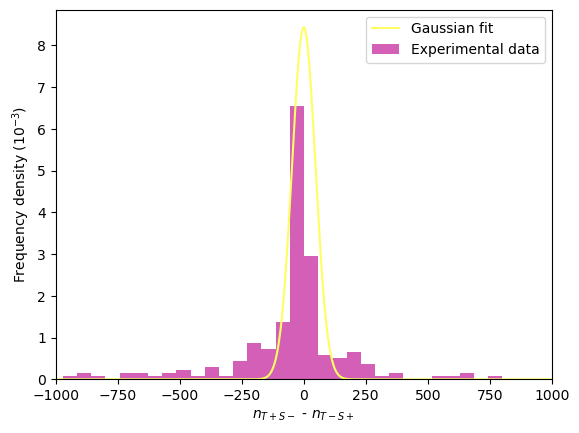

SEM: 27.063028064575917


In [42]:
# supl 3 G

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
from scipy.optimize import curve_fit
import warnings
from scipy import stats
warnings.filterwarnings('ignore')
from matplotlib.ticker import FuncFormatter

# Load dataset
df= pd.read_excel("NMP_single_cell_data_VW.xlsx")
# Preprocessing step

# Eliminate Nan
df = df.drop(columns=['outcome', 'Double_positive'])
df = df.dropna()
df.index = pd.RangeIndex(len(df.index))

# Transforms "coating" string variable to numbers 0,1,2,3. 
# ord_enc = OrdinalEncoder()
# df["coating"] = ord_enc.fit_transform(df[["coating"]])
df["coating"].replace("Fibronectin",0,inplace=True)
df["coating"].replace("Gelatin",1,inplace=True)
df["coating"].replace("Geltrex",2,inplace=True)
df["coating"].replace("Matrigel",3,inplace=True)
df["dominating_type_gfp"] = np.zeros(df.shape[0])
df["dominating_type_mcherry"] = np.zeros(df.shape[0])

df["dominating_type"] = np.zeros(df.shape[0])
df["total_cells_target"] = np.zeros(df.shape[0])

df.index = pd.RangeIndex(len(df.index))

df["cell_cycle"] = np.zeros(df.shape[0])
df["total_cells_target"] = np.zeros(df.shape[0])
for i in range(df.shape[0]):
#     print(df.total_cells.iloc[[i]] )
    if df["total_cells"][i] == 0:
        df["cell_cycle"][i] = np.nan
df = df.dropna()
df.index = pd.RangeIndex(len(df.index))

          
df["dominating_type"] = np.zeros(df.shape[0])
for i in range(df.shape[0]):
    df["dominating_type"][i] = df["t_cells"][i]-df["sox2_cells"][i]
def func(x,a):
    return stats.norm.pdf(x,0,a)
hist, bin_edges = np.histogram(df["dominating_type"], bins=5718, density=True)
bines = []
for i in range(len(bin_edges)-1):
    bines.append((bin_edges[i+1]+bin_edges[i])/2)
popt, pcov = curve_fit(func, bines, hist)        


def scale_y(x, pos):
    return f'{x * 1000:.0f}'

formatter = FuncFormatter(scale_y)

plt.plot(range(-1000,1000),func(range(-1000,1000),popt[0]),label="Gaussian fit",color="#FEFE62")
plt.hist(df["dominating_type"], bins=100, density=True,label="Experimental data",color="#D35FB7")
plt.xlim(-1000,1000)
plt.gca().yaxis.set_major_formatter(formatter)
plt.legend()
plt.xlabel("$n_{T+S-}$ - $n_{T-S+}$")
plt.ylabel("Frequency density ($10^{-3}$)")
plt.savefig("Supfig4a.svg")
plt.show()
plt.close()

sem = stats.sem(df["dominating_type"])
print(f"SEM: {sem}")

### Sup fig 3 H

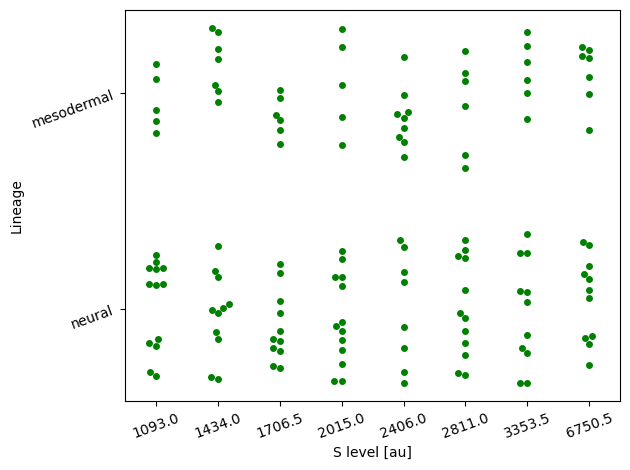

In [7]:
# Sup fig 3 H
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df= pd.read_excel("NMP_single_cell_data_VW.xlsx")
# Preprocessing step

# Eliminate Nan
df = df.drop(columns=['outcome', 'Double_positive'])
df = df.dropna()
df.index = pd.RangeIndex(len(df.index))

# Transforms "coating" string variable to numbers 0,1,2,3. 
# ord_enc = OrdinalEncoder()
# df["coating"] = ord_enc.fit_transform(df[["coating"]])
df["coating"].replace("Fibronectin",0,inplace=True)
df["coating"].replace("Gelatin",1,inplace=True)
df["coating"].replace("Geltrex",2,inplace=True)
df["coating"].replace("Matrigel",3,inplace=True)
df["dominating_type_gfp"] = np.zeros(df.shape[0])
df["dominating_type_mcherry"] = np.zeros(df.shape[0])
df["Fibronectin"] = np.zeros(df.shape[0])
df["Gelatin"] = np.zeros(df.shape[0])
df["dominating_type_gfp"] = np.zeros(df.shape[0])
df["Geltrex"] = np.zeros(df.shape[0])
df["Matrigel"] = np.zeros(df.shape[0])
df["total_cells_target"] = np.zeros(df.shape[0])

df["level_gfp"] = np.zeros(df.shape[0])

for i in range(df.shape[0]):
#     print(df.total_cells.iloc[[i]] )
    if df["total_cells"][i] == 0:
        df["Matrigel"][i] = np.nan
df = df.dropna()
df.index = pd.RangeIndex(len(df.index))



df["0"] = np.zeros(df.shape[0])
df["1"] = np.zeros(df.shape[0])
df["2"] = np.zeros(df.shape[0])
df["3"] = np.zeros(df.shape[0])
df["4"] = np.zeros(df.shape[0])
df["5"] = np.zeros(df.shape[0])
df["6"] = np.zeros(df.shape[0])
df["7"] = np.zeros(df.shape[0])

df["dominating_type"] = np.zeros(df.shape[0])

for i in range(df.shape[0]):
#     print(df.total_cells.iloc[[i]] )
    if df["total_cells"][i] == 0:
        df["dominating_type"][i] = np.nan
    else:
        if df["t_cells"][i]+27<df["sox2_cells"][i]:
            df["dominating_type"][i] = 0
        elif df["sox2_cells"][i]+27<df["t_cells"][i]:
            df["dominating_type"][i] = 1
        else:
            df["dominating_type"][i] = np.nan
df = df.dropna()
df.index = pd.RangeIndex(len(df.index)) 

df["level_gfp"] , bin_edges= pd.qcut(df["mcherry_mean"], 8, labels=False, retbins=True)


swarm_dispertion = 0.7
            
            
for i in range(df.shape[0]):
#     print(df.total_cells.iloc[[i]] )
    if df["level_gfp"][i] == 0:
        if df["dominating_type"][i] == 0:
            df["0"][i]=1+swarm_dispertion*np.random.rand()-swarm_dispertion/2
        else:
            df["0"][i]=2+swarm_dispertion*np.random.rand()-swarm_dispertion/2

    elif df["level_gfp"][i] == 1:
        if df["dominating_type"][i] == 0:
            df["1"][i]=1+swarm_dispertion*np.random.rand()-swarm_dispertion/2
        else:
            df["1"][i]=2 +swarm_dispertion*np.random.rand()-swarm_dispertion/2

    elif df["level_gfp"][i] == 2:
        if df["dominating_type"][i] == 0:
            df["2"][i]=1+swarm_dispertion*np.random.rand()-swarm_dispertion/2
        else:
            df["2"][i]=2+swarm_dispertion*np.random.rand()-swarm_dispertion/2 

    elif df["level_gfp"][i] == 3:
        if df["dominating_type"][i] == 0:
            df["3"][i]=1+swarm_dispertion*np.random.rand()-swarm_dispertion/2
        else:
            df["3"][i]=2+swarm_dispertion*np.random.rand()-swarm_dispertion/2     
            
    elif df["level_gfp"][i] == 4:
        if df["dominating_type"][i] == 0:
            df["4"][i]=1+swarm_dispertion*np.random.rand()-swarm_dispertion/2
        else:
            df["4"][i]=2+swarm_dispertion*np.random.rand()-swarm_dispertion/2

    elif df["level_gfp"][i] == 5:
        if df["dominating_type"][i] == 0:
            df["5"][i]=1+swarm_dispertion*np.random.rand()-swarm_dispertion/2
        else:
            df["5"][i]=2 +swarm_dispertion*np.random.rand()-swarm_dispertion/2

    elif df["level_gfp"][i] == 6:
        if df["dominating_type"][i] == 0:
            df["6"][i]=1+swarm_dispertion*np.random.rand()-swarm_dispertion/2
        else:
            df["6"][i]=2+swarm_dispertion*np.random.rand()-swarm_dispertion/2 

    elif df["level_gfp"][i] == 7:
        if df["dominating_type"][i] == 0:
            df["7"][i]=1+swarm_dispertion*np.random.rand()-swarm_dispertion/2
        else:
            df["7"][i]=2+swarm_dispertion*np.random.rand()-swarm_dispertion/2     



sns.swarmplot(data=[df["0"].loc[df["0"]!=0],
                     df["1"].loc[df["1"]!=0],
                     df["2"].loc[df["2"]!=0],
                     df["3"].loc[df["3"]!=0],
                     df["4"].loc[df["4"]!=0],
                     df["5"].loc[df["5"]!=0],
                     df["6"].loc[df["6"]!=0],
                     df["7"].loc[df["7"]!=0]], color='green')


plt.yticks([1, 2], ['neural', 'mesodermal'], rotation=20)
plt.xticks([0,1,2,3,4,5,6,7], [str(int(bin_edges[0]))+"-"+str(int(bin_edges[1])),
                               str(int(bin_edges[1]))+"-"+str(int(bin_edges[2])),
                               str(int(bin_edges[2]))+"-"+str(int(bin_edges[3])),
                               str(int(bin_edges[3]))+"-"+str(int(bin_edges[4])),
                               str(int(bin_edges[4]))+"-"+str(int(bin_edges[5])),
                               str(int(bin_edges[5]))+"-"+str(int(bin_edges[6])),
                               str(int(bin_edges[6]))+"-"+str(int(bin_edges[7])),
                               str(int(bin_edges[7]))+"-"+str(int(bin_edges[8]))], 
           rotation=20)
binplot=[]
for xi in range(0,8):
    binplot.append(str((int(bin_edges[xi+1])+int(bin_edges[xi]))/2))

plt.xticks(range(0,8), binplot, 
           rotation=20)


plt.xlabel("S level [au]")
plt.ylabel("Lineage")
plt.tight_layout()
plt.savefig("Supfig4b.svg")
plt.show()
plt.close()


#### Sup fig 3 I

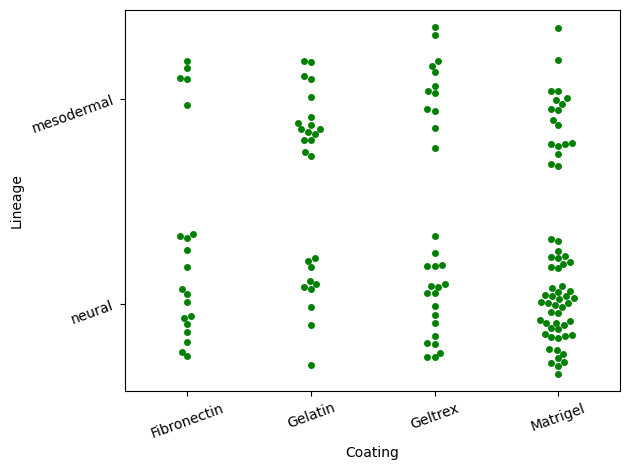

In [9]:
# Sup fig 3 I

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df= pd.read_excel("NMP_single_cell_data_VW.xlsx")
# Preprocessing step

# Eliminate Nan
df = df.drop(columns=['outcome', 'Double_positive'])
df = df.dropna()
df.index = pd.RangeIndex(len(df.index))

# Transforms "coating" string variable to numbers 0,1,2,3. 
# ord_enc = OrdinalEncoder()
# df["coating"] = ord_enc.fit_transform(df[["coating"]])
df["coating"].replace("Fibronectin",0,inplace=True)
df["coating"].replace("Gelatin",1,inplace=True)
df["coating"].replace("Geltrex",2,inplace=True)
df["coating"].replace("Matrigel",3,inplace=True)
df["dominating_type_gfp"] = np.zeros(df.shape[0])
df["dominating_type_mcherry"] = np.zeros(df.shape[0])
df["Fibronectin"] = np.zeros(df.shape[0])
df["Gelatin"] = np.zeros(df.shape[0])
df["dominating_type_gfp"] = np.zeros(df.shape[0])
df["Geltrex"] = np.zeros(df.shape[0])
df["Matrigel"] = np.zeros(df.shape[0])
df["total_cells_target"] = np.zeros(df.shape[0])

df["level_gfp"] = np.zeros(df.shape[0])

for i in range(df.shape[0]):
#     print(df.total_cells.iloc[[i]] )
    if df["total_cells"][i] == 0:
        df["Matrigel"][i] = np.nan
df = df.dropna()
df.index = pd.RangeIndex(len(df.index))

df["level_gfp"] = df["coating"]


df["0"] = np.zeros(df.shape[0])
df["1"] = np.zeros(df.shape[0])
df["2"] = np.zeros(df.shape[0])
df["3"] = np.zeros(df.shape[0])

df["dominating_type"] = np.zeros(df.shape[0])

for i in range(df.shape[0]):
#     print(df.total_cells.iloc[[i]] )
    if df["total_cells"][i] == 0:
        df["dominating_type"][i] = np.nan
    else:
        if df["t_cells"][i]+27<df["sox2_cells"][i]:
            df["dominating_type"][i] = 0
        elif df["sox2_cells"][i]+27<df["t_cells"][i]:
            df["dominating_type"][i] = 1
        else:
            df["dominating_type"][i] = np.nan
df = df.dropna()
df.index = pd.RangeIndex(len(df.index)) 

swarm_dispertion = 0.7
            
            
for i in range(df.shape[0]):
#     print(df.total_cells.iloc[[i]] )
    if df["level_gfp"][i] == 0:
        if df["dominating_type"][i] == 0:
            df["0"][i]=1+swarm_dispertion*np.random.rand()-swarm_dispertion/2
        else:
            df["0"][i]=2+swarm_dispertion*np.random.rand()-swarm_dispertion/2

    elif df["level_gfp"][i] == 1:
        if df["dominating_type"][i] == 0:
            df["1"][i]=1+swarm_dispertion*np.random.rand()-swarm_dispertion/2
        else:
            df["1"][i]=2 +swarm_dispertion*np.random.rand()-swarm_dispertion/2

    elif df["level_gfp"][i] == 2:
        if df["dominating_type"][i] == 0:
            df["2"][i]=1+swarm_dispertion*np.random.rand()-swarm_dispertion/2
        else:
            df["2"][i]=2+swarm_dispertion*np.random.rand()-swarm_dispertion/2 

    elif df["level_gfp"][i] == 3:
        if df["dominating_type"][i] == 0:
            df["3"][i]=1+swarm_dispertion*np.random.rand()-swarm_dispertion/2
        else:
            df["3"][i]=2+swarm_dispertion*np.random.rand()-swarm_dispertion/2             

sns.swarmplot(data=[df["0"].loc[df["0"]!=0],
                     df["1"].loc[df["1"]!=0],
                     df["2"].loc[df["2"]!=0],
                     df["3"].loc[df["3"]!=0]], color='green')


plt.yticks([1, 2], ['neural', 'mesodermal'], rotation=20)
plt.xticks([0,1,2,3], ["Fibronectin",
                         "Gelatin",
                         "Geltrex",
                    "Matrigel"], 
           rotation=20)
plt.xlabel("Coating")
plt.ylabel("Lineage")
plt.tight_layout()
plt.savefig("Supfig4c.svg")
plt.show()
plt.close()

### Sup fig 4 A

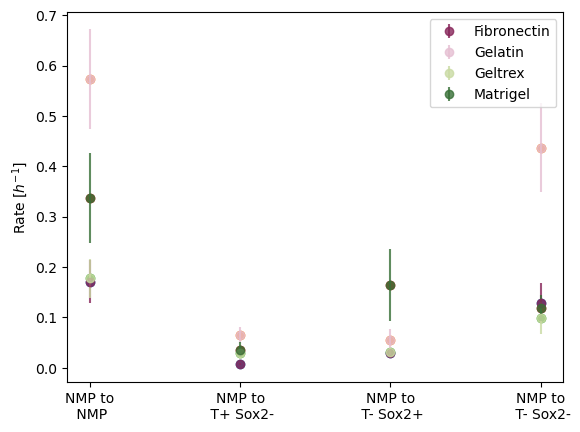

In [18]:
# Sup fig 4 A

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.optimize import minimize, rosen, rosen_der
import math
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import mannwhitneyu

def dp_cells(t, a, b, c, d, dp0):
    cells = dp0 * np.exp((a-b-c-d) * t)
    return cells

def t_cells(t, a, b, c, d, dp0, t0):
    cells = 2 * b * dp0 * np.exp((a-b-c-d) * t) / (a-b-c-d) + t0
    return cells

def s_cells(t, a, b, c, d, dp0, s0):
    cells = 2 * c * dp0 * np.exp((a-b-c-d) * t) / (a-b-c-d) + s0
    return cells

def dn_cells(t, a, b, c, d, dp0, dn0):
    cells = 2 * d * dp0 * np.exp((a-b-c-d) * t) / (a-b-c-d) + dn0
    return cells


def min_func(param):
    a=param[0] + param[1] + param[2] + param[3]
    b=param[1]
    c=param[2]
    d=param[3]

    if not math.isnan(np.sqrt((dp_cells(t, a, b, c, d, dp0)-cell_fit[0])**2+
                   (t_cells(t, a, b, c, d, dp0, t0)-cell_fit[1])**2+
                   (s_cells(t, a, b, c, d, dp0, s0)-cell_fit[2])**2+
                   (dn_cells(t, a, b, c, d, dp0, dn0)-cell_fit[3])**2)):
        if dp_cells(t, a, b, c, d, dp0) + t_cells(t, a, b, c, d, dp0, t0) + s_cells(t, a, b, c, d, dp0, s0) + dn_cells(t, a, b, c, d, dp0, dn0) < 1:
            return 1000000000000000
        else:
            return np.sqrt((dp_cells(t, a, b, c, d, dp0)-cell_fit[0])**2+
                   (t_cells(t, a, b, c, d, dp0, t0)-cell_fit[1])**2+
                   (s_cells(t, a, b, c, d, dp0, s0)-cell_fit[2])**2+
                   (dn_cells(t, a, b, c, d, dp0, dn0)-cell_fit[3])**2)    
    else:
        return 1000000000000000

# Load dataset
df= pd.read_excel("NMP_single_cell_data_VW.xlsx")
# Preprocessing step

# Eliminate Nan
df = df.drop(columns=['outcome', 'Double_positive'])
df = df.dropna()
df.index = pd.RangeIndex(len(df.index))
df["coating"].replace("Fibronectin",0,inplace=True)
df["coating"].replace("Gelatin",1,inplace=True)
df["coating"].replace("Geltrex",2,inplace=True)
df["coating"].replace("Matrigel",3,inplace=True)
df["dummy_variable"] = np.zeros(df.shape[0])
for i in range(df.shape[0]):
    if df["total_cells"][i] == 0:
        df["dummy_variable"][i] = np.nan
df = df.dropna()
df.index = pd.RangeIndex(len(df.index))

dp0 = 1
t0 = 0
s0 = 0
dn0 = 0
t = 5 * 24

parameters_0_minus = []
parameters_0_plus = []
parameters_1_minus = []
parameters_1_plus = []
parameters_2_minus = []
parameters_2_plus = []
parameters_3_minus = []
parameters_3_plus = []

for i in range(df.shape[0]):
    if df["coating"][i]==0:
        cell_fit = []
        cell_fit.append(df["dp_cells"][i])
        cell_fit.append(df["t_cells"][i])
        cell_fit.append(df["sox2_cells"][i])
        cell_fit.append(df["dneg_cells"][i])
        cell_fit.append(df["total_cells"][i])

        x0 = [0.05,0.02,0.02,0.02]
        max_evaluations=10000
        res = minimize(min_func,x0,bounds=((0, None), (0, None), (0, None), (0, None)), method='L-BFGS-B', options={'maxfev': max_evaluations})

        parameters_0_minus.append(res.x)



    if df["coating"][i]==1:
        cell_fit = []
        cell_fit.append(df["dp_cells"][i])
        cell_fit.append(df["t_cells"][i])
        cell_fit.append(df["sox2_cells"][i])
        cell_fit.append(df["dneg_cells"][i])
        cell_fit.append(df["total_cells"][i])

        x0 = [0.05,0.02,0.02,0.02]
        max_evaluations=10000
        res = minimize(min_func,x0,bounds=((0, None), (0, None), (0, None), (0, None)), method='L-BFGS-B', options={'maxfev': max_evaluations})

        parameters_1_minus.append(res.x)



    if df["coating"][i]==2:
        cell_fit = []
        cell_fit.append(df["dp_cells"][i])
        cell_fit.append(df["t_cells"][i])
        cell_fit.append(df["sox2_cells"][i])
        cell_fit.append(df["dneg_cells"][i])
        cell_fit.append(df["total_cells"][i])

        x0 = [0.05,0.02,0.02,0.02]
        max_evaluations=10000
        res = minimize(min_func,x0,bounds=((0, None), (0, None), (0, None), (0, None)), method='L-BFGS-B', options={'maxfev': max_evaluations})

        parameters_2_minus.append(res.x)




    if df["coating"][i]==3:
        cell_fit = []
        cell_fit.append(df["dp_cells"][i])
        cell_fit.append(df["t_cells"][i])
        cell_fit.append(df["sox2_cells"][i])
        cell_fit.append(df["dneg_cells"][i])
        cell_fit.append(df["total_cells"][i])

        x0 = [0.05,0.02,0.02,0.02]
        max_evaluations=10000
        res = minimize(min_func,x0,bounds=((0, None), (0, None), (0, None), (0, None)), method='L-BFGS-B', options={'maxfev': max_evaluations})

        parameters_3_minus.append(res.x)

resultados = [parameters_0_minus,
              parameters_1_minus,
              parameters_2_minus,
              parameters_3_minus]

counter = 0
for parameters in resultados:

    # Convertir la lista de arrays en una matriz 2D de NumPy
    data_matrix = np.array(parameters)

    for element in data_matrix:

        element[0]+=element[1]+element[2]+element[3]


    # Calcular la media y la desviación estándar de cada columna
    mean_values = np.mean(data_matrix, axis=0)
    std_values = stats.sem(data_matrix, axis=0)

    mean_to_plot = mean_values
    std_to_plot = std_values

    x_plot = range(0,4)
    plt.scatter(x_plot,mean_to_plot)
    

    if counter == 0:
        plt.errorbar(x_plot, mean_to_plot, yerr=std_to_plot, fmt='o', 
                     label="Fibronectin", color="#87265A", alpha=0.8)
        counter = 1
        mann_whitney1 = data_matrix
    elif counter == 1:
        plt.errorbar(x_plot, mean_to_plot, yerr=std_to_plot, fmt='o', 
                     label="Gelatin", color="#E5BFD2", alpha=0.8)
        counter = 2
        mann_whitney2 = data_matrix
    elif counter == 2:
        plt.errorbar(x_plot, mean_to_plot, yerr=std_to_plot, fmt='o', 
                     label="Geltrex", color="#C9DAA3", alpha=0.8)
        counter = 3
        mann_whitney3 = data_matrix
    else:
        plt.errorbar(x_plot, mean_to_plot, yerr=std_to_plot, fmt='o', 
                     label="Matrigel", color="#387037", alpha=0.8)
        counter = 0


plt.legend()
plt.xticks([0,1,2,3], ["NMP to\n NMP","NMP to\n T+ Sox2-","NMP to\n T- Sox2+","NMP to\n T- Sox2-"])
plt.ylabel(r'Rate [$h^{-1}$]')
plt.savefig("Supfig4d.svg")
plt.show()
plt.close()


### Sup fig 4 B

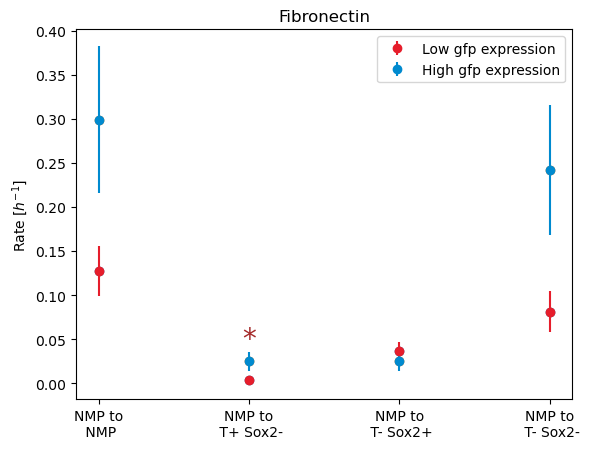

Mann whitney p= [0.20301678 0.0019159  0.16543397 0.09584581]


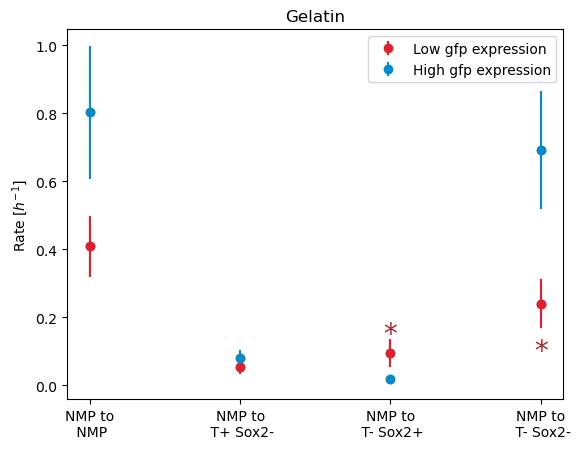

Mann whitney p= [0.13447179 0.07727146 0.02453977 0.0139088 ]


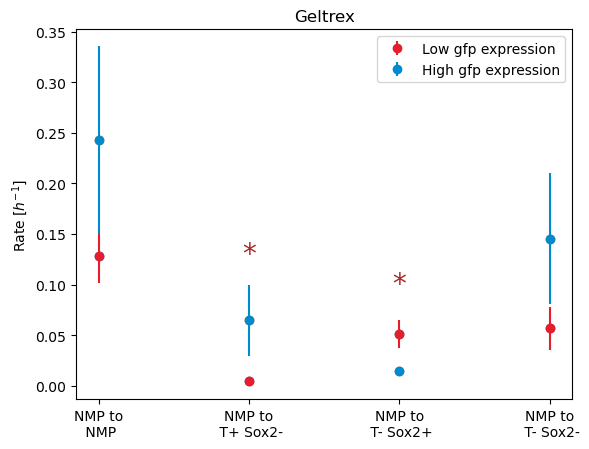

Mann whitney p= [0.93842584 0.01642484 0.03622644 0.47559488]


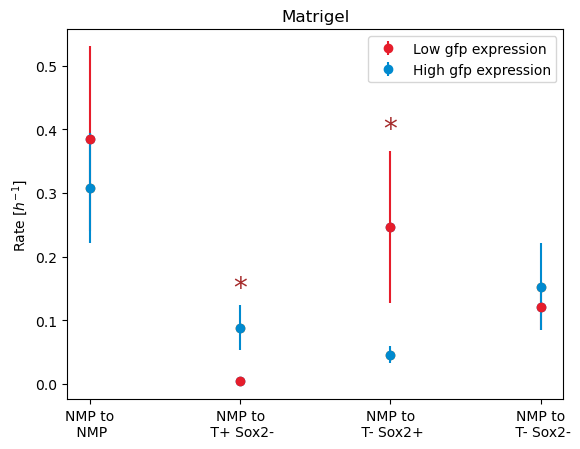

Mann whitney p= [7.21554678e-01 3.26606477e-06 2.33010503e-02 5.57368698e-01]


In [37]:
# sup 4 B
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.optimize import minimize, rosen, rosen_der
import math
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import mannwhitneyu

def dp_cells(t, a, b, c, d, dp0):
    cells = dp0 * np.exp((a-b-c-d) * t)
    return cells

def t_cells(t, a, b, c, d, dp0, t0):
    cells = 2 * b * dp0 * np.exp((a-b-c-d) * t) / (a-b-c-d) + t0
    return cells

def s_cells(t, a, b, c, d, dp0, s0):
    cells = 2 * c * dp0 * np.exp((a-b-c-d) * t) / (a-b-c-d) + s0
    return cells

def dn_cells(t, a, b, c, d, dp0, dn0):
    cells = 2 * d * dp0 * np.exp((a-b-c-d) * t) / (a-b-c-d) + dn0
    return cells


def min_func(param):
    a=param[0] + param[1] + param[2] + param[3]
    b=param[1]
    c=param[2]
    d=param[3]

    if not math.isnan(np.sqrt((dp_cells(t, a, b, c, d, dp0)-cell_fit[0])**2+
                   (t_cells(t, a, b, c, d, dp0, t0)-cell_fit[1])**2+
                   (s_cells(t, a, b, c, d, dp0, s0)-cell_fit[2])**2+
                   (dn_cells(t, a, b, c, d, dp0, dn0)-cell_fit[3])**2)):
  
        if dp_cells(t, a, b, c, d, dp0) + t_cells(t, a, b, c, d, dp0, t0) + s_cells(t, a, b, c, d, dp0, s0) + dn_cells(t, a, b, c, d, dp0, dn0) < 1:
            return 1000000000000000
        else:
            return np.sqrt((dp_cells(t, a, b, c, d, dp0)-cell_fit[0])**2+
                   (t_cells(t, a, b, c, d, dp0, t0)-cell_fit[1])**2+
                   (s_cells(t, a, b, c, d, dp0, s0)-cell_fit[2])**2+
                   (dn_cells(t, a, b, c, d, dp0, dn0)-cell_fit[3])**2)    
    else:
        return 1000000000000000

# Load dataset
df= pd.read_excel("NMP_single_cell_data_VW.xlsx")
# Preprocessing step

# Eliminate Nan
df = df.drop(columns=['outcome', 'Double_positive'])
df = df.dropna()
df.index = pd.RangeIndex(len(df.index))
df["coating"].replace("Fibronectin",0,inplace=True)
df["coating"].replace("Gelatin",1,inplace=True)
df["coating"].replace("Geltrex",2,inplace=True)
df["coating"].replace("Matrigel",3,inplace=True)
df["dummy_variable"] = np.zeros(df.shape[0])
for i in range(df.shape[0]):
#     print(df.total_cells.iloc[[i]] )
    if df["total_cells"][i] == 0:
        df["dummy_variable"][i] = np.nan
df = df.dropna()
df.index = pd.RangeIndex(len(df.index))

dp0 = 1
t0 = 0
s0 = 0
dn0 = 0
t = 5 * 24

parameters_0_minus = []
parameters_0_plus = []
parameters_1_minus = []
parameters_1_plus = []
parameters_2_minus = []
parameters_2_plus = []
parameters_3_minus = []
parameters_3_plus = []

for i in range(df.shape[0]):
    if df["gfp_mean"][i]<1745:
        if df["coating"][i]==0:
            cell_fit = []
            cell_fit.append(df["dp_cells"][i])
            cell_fit.append(df["t_cells"][i])
            cell_fit.append(df["sox2_cells"][i])
            cell_fit.append(df["dneg_cells"][i])
            cell_fit.append(df["total_cells"][i])

            x0 = [0.05,0.02,0.02,0.02]
            max_evaluations=10000
            res = minimize(min_func,x0,bounds=((0, None), (0, None), (0, None), (0, None)), method='L-BFGS-B', options={'maxfev': max_evaluations})

            parameters_0_minus.append(res.x)
    if df["gfp_mean"][i]>1745:
        if df["coating"][i]==0:
            cell_fit = []
            cell_fit.append(df["dp_cells"][i])
            cell_fit.append(df["t_cells"][i])
            cell_fit.append(df["sox2_cells"][i])
            cell_fit.append(df["dneg_cells"][i])
            cell_fit.append(df["total_cells"][i])

            x0 = [0.05,0.02,0.02,0.02]
            max_evaluations=10000
            res = minimize(min_func,x0,bounds=((0, None), (0, None), (0, None), (0, None)), method='L-BFGS-B', options={'maxfev': max_evaluations})

            parameters_0_plus.append(res.x)
            
    if df["gfp_mean"][i]<1745:
        if df["coating"][i]==1:
            cell_fit = []
            cell_fit.append(df["dp_cells"][i])
            cell_fit.append(df["t_cells"][i])
            cell_fit.append(df["sox2_cells"][i])
            cell_fit.append(df["dneg_cells"][i])
            cell_fit.append(df["total_cells"][i])

            x0 = [0.05,0.02,0.02,0.02]
            max_evaluations=10000
            res = minimize(min_func,x0,bounds=((0, None), (0, None), (0, None), (0, None)), method='L-BFGS-B', options={'maxfev': max_evaluations})

            parameters_1_minus.append(res.x)
    if df["gfp_mean"][i]>1745:
        if df["coating"][i]==1:
            cell_fit = []
            cell_fit.append(df["dp_cells"][i])
            cell_fit.append(df["t_cells"][i])
            cell_fit.append(df["sox2_cells"][i])
            cell_fit.append(df["dneg_cells"][i])
            cell_fit.append(df["total_cells"][i])

            x0 = [0.05,0.02,0.02,0.02]
            max_evaluations=10000
            res = minimize(min_func,x0,bounds=((0, None), (0, None), (0, None), (0, None)), method='L-BFGS-B', options={'maxfev': max_evaluations})

            parameters_1_plus.append(res.x)
            
    if df["gfp_mean"][i]<1745:
        if df["coating"][i]==2:
            cell_fit = []
            cell_fit.append(df["dp_cells"][i])
            cell_fit.append(df["t_cells"][i])
            cell_fit.append(df["sox2_cells"][i])
            cell_fit.append(df["dneg_cells"][i])
            cell_fit.append(df["total_cells"][i])

            x0 = [0.05,0.02,0.02,0.02]
            max_evaluations=10000
            res = minimize(min_func,x0,bounds=((0, None), (0, None), (0, None), (0, None)), method='L-BFGS-B', options={'maxfev': max_evaluations})

            parameters_2_minus.append(res.x)
    if df["gfp_mean"][i]>1745:
        if df["coating"][i]==2:
            cell_fit = []
            cell_fit.append(df["dp_cells"][i])
            cell_fit.append(df["t_cells"][i])
            cell_fit.append(df["sox2_cells"][i])
            cell_fit.append(df["dneg_cells"][i])
            cell_fit.append(df["total_cells"][i])

            x0 = [0.05,0.02,0.02,0.02]
            max_evaluations=10000
            res = minimize(min_func,x0,bounds=((0, None), (0, None), (0, None), (0, None)), method='L-BFGS-B', options={'maxfev': max_evaluations})

            parameters_2_plus.append(res.x)
            
            
    if df["gfp_mean"][i]<1745:
        if df["coating"][i]==3:
            cell_fit = []
            cell_fit.append(df["dp_cells"][i])
            cell_fit.append(df["t_cells"][i])
            cell_fit.append(df["sox2_cells"][i])
            cell_fit.append(df["dneg_cells"][i])
            cell_fit.append(df["total_cells"][i])

            x0 = [0.05,0.02,0.02,0.02]
            max_evaluations=10000
            res = minimize(min_func,x0,bounds=((0, None), (0, None), (0, None), (0, None)), method='L-BFGS-B', options={'maxfev': max_evaluations})

            parameters_3_minus.append(res.x)
    if df["gfp_mean"][i]>1745:
        if df["coating"][i]==3:
            cell_fit = []
            cell_fit.append(df["dp_cells"][i])
            cell_fit.append(df["t_cells"][i])
            cell_fit.append(df["sox2_cells"][i])
            cell_fit.append(df["dneg_cells"][i])
            cell_fit.append(df["total_cells"][i])

            x0 = [0.05,0.02,0.02,0.02]
            max_evaluations=100000
            res = minimize(min_func,x0,bounds=((0, None), (0, None), (0, None), (0, None)), method='L-BFGS-B', options={'maxfev': max_evaluations})

            parameters_3_plus.append(res.x)
resultados = [parameters_0_minus,parameters_0_plus,parameters_1_minus,parameters_1_plus,parameters_2_minus,parameters_2_plus,parameters_3_minus,parameters_3_plus]



counter = 0
counter_coating = 0
coatings = ["Fibronectin","Gelatin","Geltrex","Matrigel"]
for parameters in resultados:

   
    # Convertir la lista de arrays en una matriz 2D de NumPy
    data_matrix = np.array(parameters)

    for element in data_matrix:
        element[0]+=element[1]+element[2]+element[3]


    # Calcular la media y la desviación estándar de cada columna
    mean_values = np.mean(data_matrix, axis=0)
    std_values = stats.sem(data_matrix, axis=0)

    mean_to_plot = mean_values
    std_to_plot = std_values
    
    x_plot = range(0,4)
    plt.scatter(x_plot,mean_to_plot)
    if counter == 0:
        plt.errorbar(x_plot, mean_to_plot, yerr=std_to_plot, fmt='o', 
                     label="Low gfp expression", color="#E61D2B")  # Rojo
        counter = 1
        mann_whitney1 = data_matrix
    else:
        counter = 0
        plt.errorbar(x_plot, mean_to_plot, yerr=std_to_plot, fmt='o', 
                     label="High gfp expression", color="#008ACF")  # Azul
        plt.legend()
    
        plt.xticks([0,1,2,3], ["NMP to\n NMP","NMP to\n T+ Sox2-","NMP to\n T- Sox2+","NMP to\n T- Sox2-"])
        plt.title(coatings[counter_coating])
        plt.ylabel(r'Rate [$h^{-1}$]')
    
        # Asteriscos según coating
        if counter_coating == 0:
            plt.text(1, 0.05, '*', fontsize=20, color='brown', ha='center', va='center')
        elif counter_coating == 1:
            plt.text(2, 0.15, '*', fontsize=20, color='brown', ha='center', va='center')
            plt.text(3, 0.1, '*', fontsize=20, color='brown', ha='center', va='center')
        elif counter_coating == 2:
            plt.text(1, 0.13, '*', fontsize=20, color='brown', ha='center', va='center')
            plt.text(2, 0.1, '*', fontsize=20, color='brown', ha='center', va='center')
        elif counter_coating == 3:
            plt.text(1, 0.15, '*', fontsize=20, color='brown', ha='center', va='center')
            plt.text(2, 0.4, '*', fontsize=20, color='brown', ha='center', va='center')

        
        plt.savefig("Supfig4e-gfp1745_"+coatings[counter_coating]+".svg")
        plt.show()
        plt.close()
        counter_coating+=1      

        U1, p = mannwhitneyu(mann_whitney1, data_matrix, method="exact")
        print("Mann whitney p=",p)

### Sup fig 4 C

Correlation between GFP and mCherry: -0.144


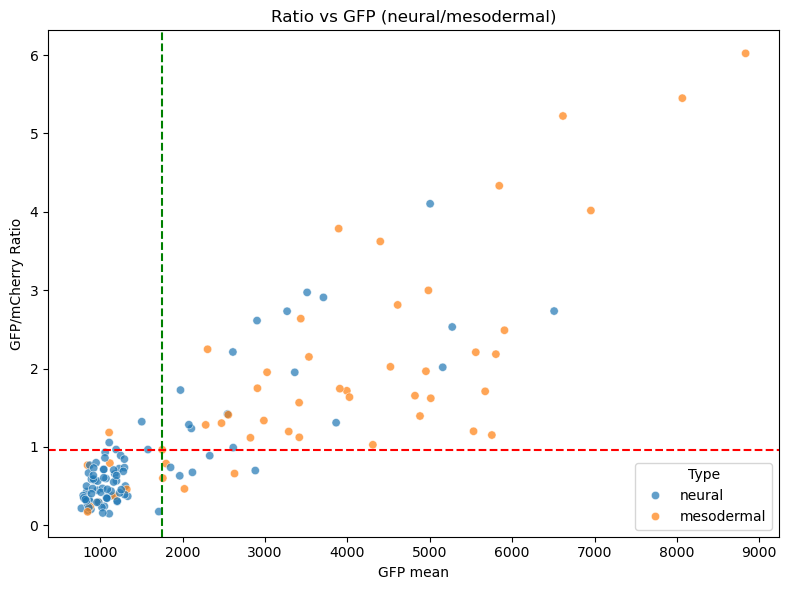

In [34]:
# ===============================
# Imports
# ===============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# Load dataset
# ===============================
df = pd.read_excel("NMP_single_cell_data_VW.xlsx")

# ===============================
# Preprocessing
# ===============================
df = df.drop(columns=['outcome', 'Double_positive'])
df = df.dropna()
df.index = pd.RangeIndex(len(df.index))

# ===============================
# Correlation
# ===============================
corr = df["gfp_mean"].corr(df["mcherry_mean"])
print(f"Correlation between GFP and mCherry: {corr:.3f}")

# ===============================
# Classification function
# ===============================
def classify(row):
    if row['t_cells'] + 27 < row['sox2_cells']:
        return 'neural'
    elif row['sox2_cells'] + 27 < row['t_cells']:
        return 'mesodermal'
    else:
        return 'otro'

df["type"] = df.apply(classify, axis=1)

# ===============================
# Ratio calculation
# ===============================
df["ratio"] = df["gfp_mean"] / df["mcherry_mean"]

# ===============================
# Filter neural/mesodermal
# ===============================
df_filtered = df[df["type"].isin(["neural", "mesodermal"])]

# ===============================
# Special coloring with 3 categories
# ===============================
def special_color(row):
    if row["gfp_mean"] > 1745 and row["mcherry_mean"] > row["gfp_mean"]:
        return "Cond A: gfp>1745 & mcherry>gfp"
    elif row["gfp_mean"] > 1745 and row["gfp_mean"] > row["mcherry_mean"]:
        return "Cond B: gfp>1745 & gfp>mcherry"
    else:
        return "Cond C: other"

df_filtered["condition"] = df_filtered.apply(special_color, axis=1)


# ===============================
# Simple scatterplot
# ===============================
plt.figure(figsize=(8, 6))

# Scatter plot: Ratio vs GFP, with hue by "type"
sns.scatterplot(data=df_filtered, x="gfp_mean", y="ratio", hue="type", alpha=0.7)

# Add threshold lines
plt.axhline(0.9660194174757285, color='red', linestyle='--')
plt.axvline(1745, color='green', linestyle='--')

# Set plot titles and labels
plt.title("Ratio vs GFP (neural/mesodermal)")
plt.xlabel("GFP mean")
plt.ylabel("GFP/mCherry Ratio")
plt.legend(title="Type")

# Show plot
plt.tight_layout()
plt.savefig("figs4c.png")
plt.show()



### Sup fig 4 D

Best threshold = 0.9660194174757285
Colonies below ratio threshold: 85
Colonies above ratio threshold: 56


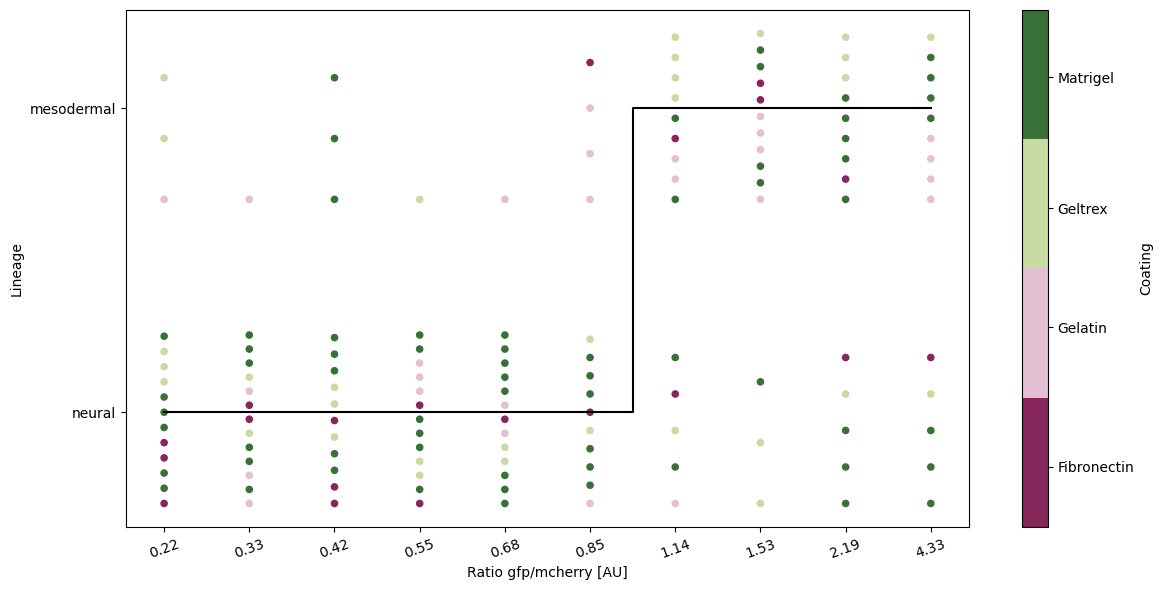

In [23]:
# sup Fig 4 D 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings('ignore')

bingfp = 10  # Cambiá esto a cualquier número de bins

# Load dataset
df = pd.read_excel("NMP_single_cell_data_VW.xlsx")

# Preprocessing
df = df.drop(columns=['outcome', 'Double_positive'])
df = df.dropna()
df.index = pd.RangeIndex(len(df.index))

df["ratio"] = df["gfp_mean"] / df["mcherry_mean"]

# Transform "coating" string variable to numbers
coating_map = {"Fibronectin":0, "Gelatin":1, "Geltrex":2, "Matrigel":3}
df["coating"] = df["coating"].map(coating_map)

# Compute dominating_type
df["dominating_type"] = np.nan
for i in range(df.shape[0]):
    if df["t_cells"][i] + 27 < df["sox2_cells"][i]:
        df["dominating_type"][i] = 0
    elif df["sox2_cells"][i] + 27 < df["t_cells"][i]:
        df["dominating_type"][i] = 1
df = df.dropna()
df.index = pd.RangeIndex(len(df.index))

# Create bins
df["level_gfp"], bin_edges_gfp = pd.qcut(df["gfp_mean"], bingfp, labels=False, retbins=True)
df["level_ratio"], bin_edges_ratio = pd.qcut(df["ratio"], bingfp, labels=False, retbins=True)

# Prepare plotting positions
swarm_dispertion = 0.4
ancho = 0.6
df["dominating_type_plot"] = 0
df["level_ratio_plot"] = df["level_ratio"].copy()

# Initialize counters for each bin
counters_0 = np.zeros(bingfp)  # for dominating_type = 0
counters_1 = np.zeros(bingfp)  # for dominating_type = 1

for i in range(df.shape[0]):
    lvl = int(df["level_ratio"][i])
    dtype = int(df["dominating_type"][i])

    # number of points in this bin & type
    n_points = df.loc[df["dominating_type"]==dtype, "level_ratio"].value_counts()[lvl]
    
    if dtype == 0:
        df["dominating_type_plot"][i] = dtype + ancho * counters_0[lvl] / n_points - ancho/2
        counters_0[lvl] += 1
    elif dtype == 1:
        df["dominating_type_plot"][i] = dtype + ancho * counters_1[lvl] / n_points - ancho/2
        counters_1[lvl] += 1

binplot=[]
for xi in range(0,bingfp):
    binplot.append(str(round((bin_edges_gfp[xi+1] + bin_edges_gfp[xi]) / 2, 2)))
    
# we do the fitting manually because curve_fit find too many local minima and could not fit correctly.
thresholds = np.arange(0, df["level_ratio"].max()+1) 
scores = []
for t in thresholds:
    score = 0
    for i in range(df.shape[0]):
        if df["level_ratio"][i] < t and df["dominating_type"][i] == 1:  # mesodermal abajo
            score += 1
        elif df["level_ratio"][i] >= t and df["dominating_type"][i] == 0:  # neural arriba
            score += 1
    scores.append(score)
scores = np.array(scores)
min_score = scores.min()
best_threshold = thresholds[np.where(scores == min_score)[0][0]]
print(f"Best threshold = {bin_edges_ratio[best_threshold]}")

below_threshold = (df["level_ratio"] < best_threshold).sum()
above_or_equal_threshold = (df["level_ratio"] >= best_threshold).sum()

print("Colonies below ratio threshold:", below_threshold)
print("Colonies above ratio threshold:", above_or_equal_threshold)

def step_func(x,a):
    result = []
    for xi in x:
        if xi>=a:
            result.append(max(df["dominating_type"]))
        else:
            result.append(min(df["dominating_type"]))
    return result
plt.figure(figsize=(12,6))
df = df.sort_values(by=['level_gfp'], ascending=False)
# plt.plot(df["level_gfp"], step_func(df["level_gfp"], best_threshold),color="black")

x = df["level_gfp"]
y = step_func(x, best_threshold)
plt.step(x, y, where='mid', color='black')


# Prepare colors
colors = ["#87265A", "#E5BFD2", "#C9DAA3", "#387037"]
cmap = ListedColormap(colors)
coatings_plot = df["coating"]

# Scatter plot

plt.scatter(df["level_ratio_plot"], df["dominating_type_plot"], c=coatings_plot, cmap=cmap, s=20)

# Colorbar
cbar = plt.colorbar(label="Coating")
cbar.set_ticks([0.35, 1.16, 1.85, 2.61])
cbar.set_ticklabels(["Fibronectin", "Gelatin", "Geltrex", "Matrigel"])

# X-axis bins labels
binplot = [str(round((bin_edges_ratio[xi+1] + bin_edges_ratio[xi]) / 2, 2)) for xi in range(bingfp)]
plt.xticks(range(0, bingfp), binplot, rotation=20)
plt.xlabel("Ratio gfp/mcherry [AU]")
plt.ylabel("Lineage")
plt.yticks([0, 1], ['neural', 'mesodermal'])
plt.tight_layout()
plt.savefig("figure5e-10bins.png")
plt.show()

### Sup fig 4 E

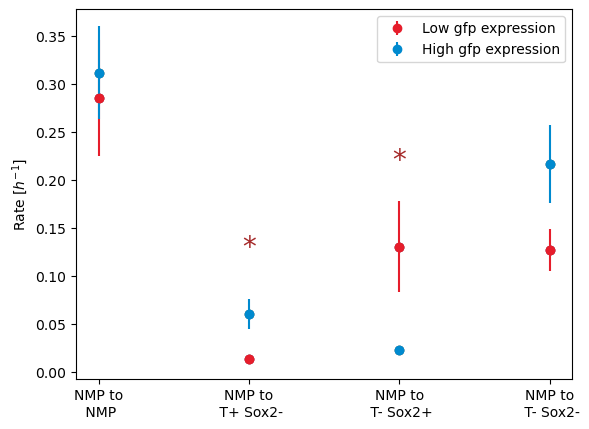

Mann whitney p= [8.27007825e-01 1.27129174e-05 4.32782046e-05 1.37937943e-01]


In [25]:
# sup fig 4 E

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.optimize import minimize, rosen, rosen_der
import math
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import mannwhitneyu
from scipy import stats

def dp_cells(t, a, b, c, d, dp0):
    cells = dp0 * np.exp((a-b-c-d) * t)
    return cells

def t_cells(t, a, b, c, d, dp0, t0):
    cells = 2 * b * dp0 * np.exp((a-b-c-d) * t) / (a-b-c-d) + t0
    return cells

def s_cells(t, a, b, c, d, dp0, s0):
    cells = 2 * c * dp0 * np.exp((a-b-c-d) * t) / (a-b-c-d) + s0
    return cells

def dn_cells(t, a, b, c, d, dp0, dn0):
    cells = 2 * d * dp0 * np.exp((a-b-c-d) * t) / (a-b-c-d) + dn0
    return cells


def min_func(param):
    a=param[0] + param[1] + param[2] + param[3]
    b=param[1]
    c=param[2]
    d=param[3]

    if not math.isnan(np.sqrt((dp_cells(t, a, b, c, d, dp0)-cell_fit[0])**2+
                   (t_cells(t, a, b, c, d, dp0, t0)-cell_fit[1])**2+
                   (s_cells(t, a, b, c, d, dp0, s0)-cell_fit[2])**2+
                   (dn_cells(t, a, b, c, d, dp0, dn0)-cell_fit[3])**2)):

        if dp_cells(t, a, b, c, d, dp0) + t_cells(t, a, b, c, d, dp0, t0) + s_cells(t, a, b, c, d, dp0, s0) + dn_cells(t, a, b, c, d, dp0, dn0) < 1:
            return 1000000000000000
        else:
            return np.sqrt((dp_cells(t, a, b, c, d, dp0)-cell_fit[0])**2+
                   (t_cells(t, a, b, c, d, dp0, t0)-cell_fit[1])**2+
                   (s_cells(t, a, b, c, d, dp0, s0)-cell_fit[2])**2+
                   (dn_cells(t, a, b, c, d, dp0, dn0)-cell_fit[3])**2)    
    else:
        return 1000000000000000

# Load dataset
df= pd.read_excel("NMP_single_cell_data_VW.xlsx")
# Preprocessing step

# Eliminate Nan
df = df.drop(columns=['outcome', 'Double_positive'])
df = df.dropna()
df.index = pd.RangeIndex(len(df.index))
df["coating"].replace("Fibronectin",0,inplace=True)
df["coating"].replace("Gelatin",1,inplace=True)
df["coating"].replace("Geltrex",2,inplace=True)
df["coating"].replace("Matrigel",3,inplace=True)
df["dummy_variable"] = np.zeros(df.shape[0])
for i in range(df.shape[0]):
    if df["total_cells"][i] == 0:
        df["dummy_variable"][i] = np.nan
df = df.dropna()
df.index = pd.RangeIndex(len(df.index))
df["ratio"] = df["gfp_mean"] / df["mcherry_mean"]
dp0 = 1
t0 = 0
s0 = 0
dn0 = 0
t = 5 * 24

parameters_0_minus = []
parameters_0_plus = []
parameters_1_minus = []
parameters_1_plus = []
parameters_2_minus = []
parameters_2_plus = []
parameters_3_minus = []
parameters_3_plus = []

for i in range(df.shape[0]):
    if df["ratio"][i]<=0.9660194174757285:
        cell_fit = []
        cell_fit.append(df["dp_cells"][i])
        cell_fit.append(df["t_cells"][i])
        cell_fit.append(df["sox2_cells"][i])
        cell_fit.append(df["dneg_cells"][i])
        cell_fit.append(df["total_cells"][i])

        x0 = [0.05,0.02,0.02,0.02]
        max_evaluations=10000
        res = minimize(min_func,x0,bounds=((0, None), (0, None), (0, None), (0, None)), method='L-BFGS-B', options={'maxfev': max_evaluations})

        parameters_0_minus.append(res.x)
    if df["ratio"][i]>0.9660194174757285:
        
        cell_fit = []
        cell_fit.append(df["dp_cells"][i])
        cell_fit.append(df["t_cells"][i])
        cell_fit.append(df["sox2_cells"][i])
        cell_fit.append(df["dneg_cells"][i])
        cell_fit.append(df["total_cells"][i])

        x0 = [0.05,0.02,0.02,0.02]
        max_evaluations=10000
        res = minimize(min_func,x0,bounds=((0, None), (0, None), (0, None), (0, None)), method='L-BFGS-B', options={'maxfev': max_evaluations})

        parameters_0_plus.append(res.x)
            

resultados = [parameters_0_minus,parameters_0_plus]
counter = 0

for parameters in resultados:

    # Convertir la lista de arrays en una matriz 2D de NumPy
    data_matrix = np.array(parameters)

    for element in data_matrix:
        element[0]+=element[1]+element[2]+element[3]

    # Calcular la media y la desviación estándar de cada columna
    mean_values = np.mean(data_matrix, axis=0)
    std_values = stats.sem(data_matrix, axis=0)

    mean_to_plot = mean_values
    std_to_plot = std_values

    x_plot = range(0,4)
    plt.scatter(x_plot,mean_to_plot)
    if counter == 0:
        plt.scatter(x_plot, mean_to_plot, color="#E61D2B")  # Rojo
        plt.errorbar(x_plot, mean_to_plot, yerr=std_to_plot, fmt='o', label="Low gfp expression", color="#E61D2B")
        counter = 1
        mann_whitney1 = data_matrix
    else:
        counter = 0
        plt.scatter(x_plot, mean_to_plot, color="#008ACF")  # Azul
        plt.errorbar(x_plot, mean_to_plot, yerr=std_to_plot, fmt='o', label="High gfp expression", color="#008ACF")
        plt.legend()
        plt.xticks([0,1,2,3], ["NMP to\n NMP","NMP to\n T+ Sox2-","NMP to\n T- Sox2+","NMP to\n T- Sox2-"])
        plt.ylabel(r'Rate [$h^{-1}$]')
        # Añadir asteriscos de significancia
        plt.text(1, 0.13, '*', fontsize=20, color='brown', ha='center', va='center')
        plt.text(2, 0.22, '*', fontsize=20, color='brown', ha='center', va='center')
        # plt.text(3, 0.35, '*', fontsize=20, color='brown', ha='center', va='center')        
        plt.savefig("figure5f-10bins.png")
        plt.show()
        plt.close()

        U1, p = mannwhitneyu(mann_whitney1, data_matrix, method="exact")

        print("Mann whitney p=",p)

### Sup fig 4 F

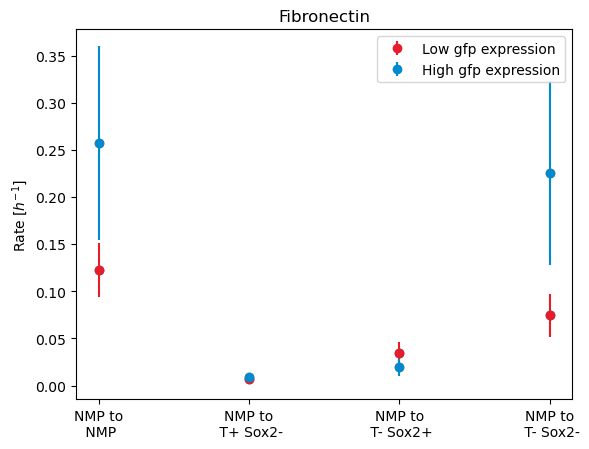

Mann whitney p= [0.54178118 0.16543397 0.20301678 0.11336292]


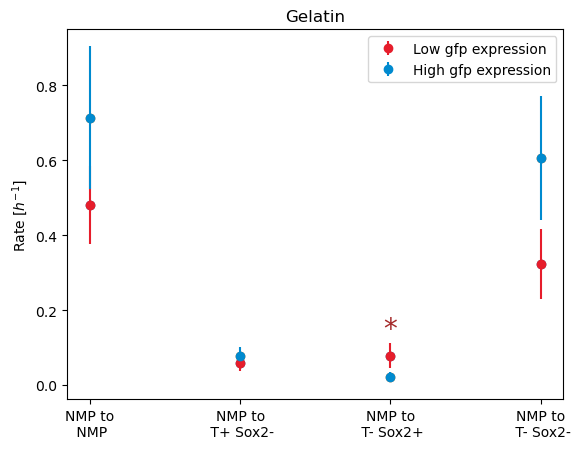

Mann whitney p= [0.41444479 0.17498381 0.02849061 0.05198606]


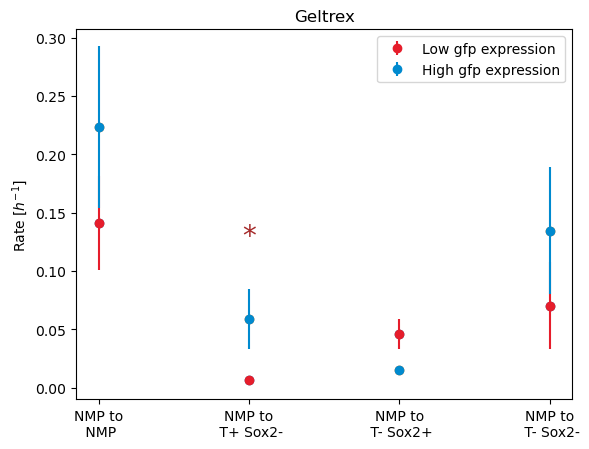

Mann whitney p= [0.88336065 0.03516819 0.08646191 0.12847185]


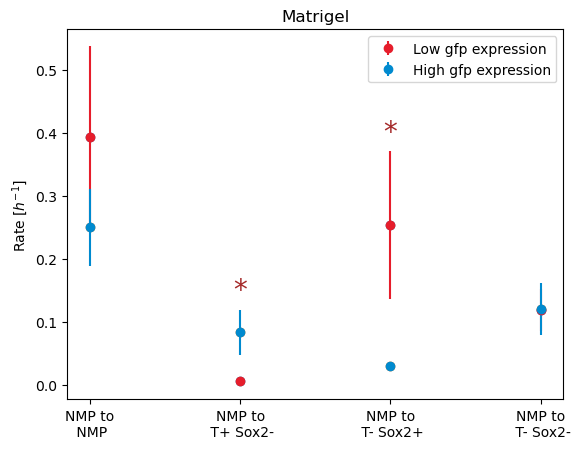

Mann whitney p= [3.18846035e-01 2.80184626e-04 1.42696756e-03 4.26761051e-01]


In [36]:
# sup 3 I
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.optimize import minimize, rosen, rosen_der
import math
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import mannwhitneyu

def dp_cells(t, a, b, c, d, dp0):
    cells = dp0 * np.exp((a-b-c-d) * t)
    return cells

def t_cells(t, a, b, c, d, dp0, t0):
    cells = 2 * b * dp0 * np.exp((a-b-c-d) * t) / (a-b-c-d) + t0
    return cells

def s_cells(t, a, b, c, d, dp0, s0):
    cells = 2 * c * dp0 * np.exp((a-b-c-d) * t) / (a-b-c-d) + s0
    return cells

def dn_cells(t, a, b, c, d, dp0, dn0):
    cells = 2 * d * dp0 * np.exp((a-b-c-d) * t) / (a-b-c-d) + dn0
    return cells


def min_func(param):
    a=param[0] + param[1] + param[2] + param[3]
    b=param[1]
    c=param[2]
    d=param[3]

    if not math.isnan(np.sqrt((dp_cells(t, a, b, c, d, dp0)-cell_fit[0])**2+
                   (t_cells(t, a, b, c, d, dp0, t0)-cell_fit[1])**2+
                   (s_cells(t, a, b, c, d, dp0, s0)-cell_fit[2])**2+
                   (dn_cells(t, a, b, c, d, dp0, dn0)-cell_fit[3])**2)):
  
        if dp_cells(t, a, b, c, d, dp0) + t_cells(t, a, b, c, d, dp0, t0) + s_cells(t, a, b, c, d, dp0, s0) + dn_cells(t, a, b, c, d, dp0, dn0) < 1:
            return 1000000000000000
        else:
            return np.sqrt((dp_cells(t, a, b, c, d, dp0)-cell_fit[0])**2+
                   (t_cells(t, a, b, c, d, dp0, t0)-cell_fit[1])**2+
                   (s_cells(t, a, b, c, d, dp0, s0)-cell_fit[2])**2+
                   (dn_cells(t, a, b, c, d, dp0, dn0)-cell_fit[3])**2)    
    else:
        return 1000000000000000

# Load dataset
df= pd.read_excel("NMP_single_cell_data_VW.xlsx")
# Preprocessing step

# Eliminate Nan
df = df.drop(columns=['outcome', 'Double_positive'])
df = df.dropna()
df.index = pd.RangeIndex(len(df.index))
df["coating"].replace("Fibronectin",0,inplace=True)
df["coating"].replace("Gelatin",1,inplace=True)
df["coating"].replace("Geltrex",2,inplace=True)
df["coating"].replace("Matrigel",3,inplace=True)
df["dummy_variable"] = np.zeros(df.shape[0])
for i in range(df.shape[0]):
#     print(df.total_cells.iloc[[i]] )
    if df["total_cells"][i] == 0:
        df["dummy_variable"][i] = np.nan
df = df.dropna()
df.index = pd.RangeIndex(len(df.index))
df["ratio"] = df["gfp_mean"] / df["mcherry_mean"]
dp0 = 1
t0 = 0
s0 = 0
dn0 = 0
t = 5 * 24

parameters_0_minus = []
parameters_0_plus = []
parameters_1_minus = []
parameters_1_plus = []
parameters_2_minus = []
parameters_2_plus = []
parameters_3_minus = []
parameters_3_plus = []

for i in range(df.shape[0]):
    if df["ratio"][i]<0.9660194174757285:
        if df["coating"][i]==0:
            cell_fit = []
            cell_fit.append(df["dp_cells"][i])
            cell_fit.append(df["t_cells"][i])
            cell_fit.append(df["sox2_cells"][i])
            cell_fit.append(df["dneg_cells"][i])
            cell_fit.append(df["total_cells"][i])

            x0 = [0.05,0.02,0.02,0.02]
            max_evaluations=10000
            res = minimize(min_func,x0,bounds=((0, None), (0, None), (0, None), (0, None)), method='L-BFGS-B', options={'maxfev': max_evaluations})

            parameters_0_minus.append(res.x)
    if df["ratio"][i]>0.9660194174757285:
        if df["coating"][i]==0:
            cell_fit = []
            cell_fit.append(df["dp_cells"][i])
            cell_fit.append(df["t_cells"][i])
            cell_fit.append(df["sox2_cells"][i])
            cell_fit.append(df["dneg_cells"][i])
            cell_fit.append(df["total_cells"][i])

            x0 = [0.05,0.02,0.02,0.02]
            max_evaluations=10000
            res = minimize(min_func,x0,bounds=((0, None), (0, None), (0, None), (0, None)), method='L-BFGS-B', options={'maxfev': max_evaluations})

            parameters_0_plus.append(res.x)
            
    if df["ratio"][i]<0.9660194174757285:
        if df["coating"][i]==1:
            cell_fit = []
            cell_fit.append(df["dp_cells"][i])
            cell_fit.append(df["t_cells"][i])
            cell_fit.append(df["sox2_cells"][i])
            cell_fit.append(df["dneg_cells"][i])
            cell_fit.append(df["total_cells"][i])

            x0 = [0.05,0.02,0.02,0.02]
            max_evaluations=10000
            res = minimize(min_func,x0,bounds=((0, None), (0, None), (0, None), (0, None)), method='L-BFGS-B', options={'maxfev': max_evaluations})

            parameters_1_minus.append(res.x)
    if df["ratio"][i]>0.9660194174757285:
        if df["coating"][i]==1:
            cell_fit = []
            cell_fit.append(df["dp_cells"][i])
            cell_fit.append(df["t_cells"][i])
            cell_fit.append(df["sox2_cells"][i])
            cell_fit.append(df["dneg_cells"][i])
            cell_fit.append(df["total_cells"][i])

            x0 = [0.05,0.02,0.02,0.02]
            max_evaluations=10000
            res = minimize(min_func,x0,bounds=((0, None), (0, None), (0, None), (0, None)), method='L-BFGS-B', options={'maxfev': max_evaluations})

            parameters_1_plus.append(res.x)
            
    if df["ratio"][i]<0.9660194174757285:
        if df["coating"][i]==2:
            cell_fit = []
            cell_fit.append(df["dp_cells"][i])
            cell_fit.append(df["t_cells"][i])
            cell_fit.append(df["sox2_cells"][i])
            cell_fit.append(df["dneg_cells"][i])
            cell_fit.append(df["total_cells"][i])

            x0 = [0.05,0.02,0.02,0.02]
            max_evaluations=10000
            res = minimize(min_func,x0,bounds=((0, None), (0, None), (0, None), (0, None)), method='L-BFGS-B', options={'maxfev': max_evaluations})

            parameters_2_minus.append(res.x)
    if df["ratio"][i]>0.9660194174757285:
        if df["coating"][i]==2:
            cell_fit = []
            cell_fit.append(df["dp_cells"][i])
            cell_fit.append(df["t_cells"][i])
            cell_fit.append(df["sox2_cells"][i])
            cell_fit.append(df["dneg_cells"][i])
            cell_fit.append(df["total_cells"][i])

            x0 = [0.05,0.02,0.02,0.02]
            max_evaluations=10000
            res = minimize(min_func,x0,bounds=((0, None), (0, None), (0, None), (0, None)), method='L-BFGS-B', options={'maxfev': max_evaluations})

            parameters_2_plus.append(res.x)
            
            
    if df["ratio"][i]<0.9660194174757285:
        if df["coating"][i]==3:
            cell_fit = []
            cell_fit.append(df["dp_cells"][i])
            cell_fit.append(df["t_cells"][i])
            cell_fit.append(df["sox2_cells"][i])
            cell_fit.append(df["dneg_cells"][i])
            cell_fit.append(df["total_cells"][i])

            x0 = [0.05,0.02,0.02,0.02]
            max_evaluations=10000
            res = minimize(min_func,x0,bounds=((0, None), (0, None), (0, None), (0, None)), method='L-BFGS-B', options={'maxfev': max_evaluations})

            parameters_3_minus.append(res.x)
    if df["ratio"][i]>0.9660194174757285:
        if df["coating"][i]==3:
            cell_fit = []
            cell_fit.append(df["dp_cells"][i])
            cell_fit.append(df["t_cells"][i])
            cell_fit.append(df["sox2_cells"][i])
            cell_fit.append(df["dneg_cells"][i])
            cell_fit.append(df["total_cells"][i])

            x0 = [0.05,0.02,0.02,0.02]
            max_evaluations=100000
            res = minimize(min_func,x0,bounds=((0, None), (0, None), (0, None), (0, None)), method='L-BFGS-B', options={'maxfev': max_evaluations})

            parameters_3_plus.append(res.x)
resultados = [parameters_0_minus,parameters_0_plus,parameters_1_minus,parameters_1_plus,parameters_2_minus,parameters_2_plus,parameters_3_minus,parameters_3_plus]



counter = 0
counter_coating = 0
coatings = ["Fibronectin","Gelatin","Geltrex","Matrigel"]
for parameters in resultados:

   
    # Convertir la lista de arrays en una matriz 2D de NumPy
    data_matrix = np.array(parameters)

    for element in data_matrix:
        element[0]+=element[1]+element[2]+element[3]


    # Calcular la media y la desviación estándar de cada columna
    mean_values = np.mean(data_matrix, axis=0)
    std_values = stats.sem(data_matrix, axis=0)

    mean_to_plot = mean_values
    std_to_plot = std_values
    
    x_plot = range(0,4)
    plt.scatter(x_plot,mean_to_plot)
    if counter == 0:
        plt.errorbar(x_plot, mean_to_plot, yerr=std_to_plot, fmt='o', 
                     label="Low gfp expression", color="#E61D2B")  # Rojo
        counter = 1
        mann_whitney1 = data_matrix
    else:
        counter = 0
        plt.errorbar(x_plot, mean_to_plot, yerr=std_to_plot, fmt='o', 
                     label="High gfp expression", color="#008ACF")  # Azul
        plt.legend()
    
        plt.xticks([0,1,2,3], ["NMP to\n NMP","NMP to\n T+ Sox2-","NMP to\n T- Sox2+","NMP to\n T- Sox2-"])
        plt.title(coatings[counter_coating])
        plt.ylabel(r'Rate [$h^{-1}$]')
    
        # Asteriscos según coating
        # if counter_coating == 0:
            # plt.text(1, 0.05, '*', fontsize=20, color='brown', ha='center', va='center')
        if counter_coating == 1:
            plt.text(2, 0.15, '*', fontsize=20, color='brown', ha='center', va='center')
            # plt.text(3, 0.1, '*', fontsize=20, color='brown', ha='center', va='center')
        elif counter_coating == 2:
            plt.text(1, 0.13, '*', fontsize=20, color='brown', ha='center', va='center')
            # plt.text(2, 0.1, '*', fontsize=20, color='brown', ha='center', va='center')
        elif counter_coating == 3:
            plt.text(1, 0.15, '*', fontsize=20, color='brown', ha='center', va='center')
            plt.text(2, 0.4, '*', fontsize=20, color='brown', ha='center', va='center')

        
        plt.savefig("Supfig3_"+coatings[counter_coating]+"-10bins.svg")
        plt.show()
        plt.close()
        counter_coating+=1      

        U1, p = mannwhitneyu(mann_whitney1, data_matrix, method="exact")
        print("Mann whitney p=",p)